## The Root Finding Method: Bisection, False-position, Newton-Raphson, and Secant

Package importing process.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

This is the function that we'll be solving using these four methods. This function is a nonlinear function which explains the phenomenon of blackbody radiation.

### Wien's Displacement Constant

Planck's radiation law tells us that the intensity of radiation per unit area and per unit wavelength from a blackbody at temperature $T$ is $$I\left(\lambda\right)=\frac{2\pi hc^2\lambda^{-5}}{e^{\frac{hc}{\lambda \kappa_BT}-1}}$$ where $h$ is Planck's constant, $c$ is the speed of light, and $k_B$ is Boltzmann's constant.

By differentiating, we know that the wavelength $\lambda$ at which the emitted radiation is strongest is the solution of the equation $$5e^{-\frac{hc}{\lambda \kappa_B T}}+\frac{hc}{\lambda \kappa_B T}-5=0$$ If we make the substitution that $$x=\frac{hc}{\lambda \kappa_B T}$$ we could see that the equation becomes $$5e^{-x}+x-5=0$$ where we know that the wavelength of maximum emitted radiation is related to temperature by $$\lambda=\frac{b}{T}$$ The so-called Wien's displacement constant is defined by $$b=\frac{hc}{\kappa_B x}$$

### These are the root finding methods that are going to be used. The methods consist of the bisection method, false-position method, Newton-Raphson method, and secant method.

This is the bisection method. We first define the function and then define the bisection method.

In [2]:
# Global constants

# Wien
clight=3*1e8
h=6.62*1e-34
kb=1.3806*1e-23

# Square Well Potential
w=1 #in m
V=20 #in eV
me=9.1094*1e-31 #in kg
hbar=h/(2*math.pi)


Here's a graph of the function.

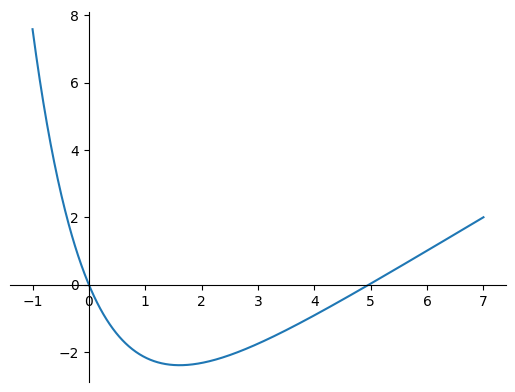

In [3]:
#For the problem in Wien's Displacement Law

x=np.linspace(-1,7,1000)
y=5*np.exp(-x)+x-5

ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')

plt.plot(x,y)
plt.show()

This is the bisection method and the false-position method, written in the form of a function.

In [4]:
def f(x):
    return 5*math.exp(-x)+x-5

def bisection(a,b,tol=1e-6):
    if f(a)*f(b)>0:
        return print("The initial values have the same sign when substituted to the function")
    n=0
    
    while (b-a)>tol:
        x=(a+b)/2
        fx=f(x)
        if fx==0:
            return n,x
        elif f(a)*f(x)<0:
            b=x
        else:
            a=x
        
        n+=1
        print("Iteration counter: %s value calculated: %s" %(n,x))
    return (n,x)

In [5]:
def falseposition(a,b,tol=1e-4):
    if f(a)*f(b)>0:
        return print("Choose different initial guesses")
    n=0
    while (b-a)>tol:
        x=(a*f(b)-b*f(a))/(f(b)-f(a))
        fx=f(x)
        if f(x)==0:
            return (n,x)
        elif f(a)*f(x)<0:
            b=x
        else:
            a=x
        
        n+=1
        print("Iteration counter: %s value calculated: %s" %(n,x))
    return (n,x)

The execution of the function.

In [6]:
c=bisection(4,5,1e-6)
print()
print("Bisection method")
print("Reached convergence after %s iterations and gives %s as a result" %(c[0],c[1]))

Iteration counter: 1 value calculated: 4.5
Iteration counter: 2 value calculated: 4.75
Iteration counter: 3 value calculated: 4.875
Iteration counter: 4 value calculated: 4.9375
Iteration counter: 5 value calculated: 4.96875
Iteration counter: 6 value calculated: 4.953125
Iteration counter: 7 value calculated: 4.9609375
Iteration counter: 8 value calculated: 4.96484375
Iteration counter: 9 value calculated: 4.966796875
Iteration counter: 10 value calculated: 4.9658203125
Iteration counter: 11 value calculated: 4.96533203125
Iteration counter: 12 value calculated: 4.965087890625
Iteration counter: 13 value calculated: 4.9652099609375
Iteration counter: 14 value calculated: 4.96514892578125
Iteration counter: 15 value calculated: 4.965118408203125
Iteration counter: 16 value calculated: 4.9651031494140625
Iteration counter: 17 value calculated: 4.965110778808594
Iteration counter: 18 value calculated: 4.965114593505859
Iteration counter: 19 value calculated: 4.965112686157227
Iteration c

In [7]:
d=falseposition(4,5,1e-6)
print()
print("False-position method")
print("Reached convergence after %s iterations and gives %s as a result" %(d[0],d[1]))

Iteration counter: 1 value calculated: 4.964240184367451
Iteration counter: 2 value calculated: 4.965113687178466
Iteration counter: 3 value calculated: 4.965114231405094
Iteration counter: 4 value calculated: 4.965114231744065

False-position method
Reached convergence after 4 iterations and gives 4.965114231744276 as a result


This is the Newton-Raphson method. In order to apply this method, we need to know the derivative of the function. Albeit aforementioned, we could approach this by differentiating the function numerically using the finite difference approach. The derivative of a function at a point $x$ could be approximated as $$f'(x)=\frac{f(x+h)-f(x-h)}{2h}$$ Here, $f$ is the original function and $h$ is the step-size for the approximation.

In [8]:
def numder(x,h=1e-4):
    return (f(x+h)-f(x-h))/(2*h)

# Now, the Newton-Raphson method.

def NewtonRaphson(a,tol=1e-6):
    x=a
    n=0
    while abs(f(x))>tol:
        try:
            x=x-f(x)/numder(x)
            print("Iteration counter: %s value calculated: %s" %(n+1,x))
        except ZeroDivisionError:
            print("Newton-Raphson method failed: zero denominator")
            break
        n+=1
    return (n,x)


In [9]:
e=NewtonRaphson(4)
print()
print("Newton-Raphson method")
print("Reached convergence after %s iterations and gives %s as a result" %(e[0],e[1]))

Iteration counter: 1 value calculated: 5.0000000001658975
Iteration counter: 2 value calculated: 4.96513569583459
Iteration counter: 3 value calculated: 4.965114231752602

Newton-Raphson method
Reached convergence after 3 iterations and gives 4.965114231752602 as a result


Last on the list, this is the secant method.

In [10]:
def secant(x0,x1,tol=1e-6):
    n=0
    while abs(f(x1))>tol:
        try:
            x2=x1-f(x1)*(x1-x0)/(f(x1)-f(x0))
            print("Iteration counter: %s value calculated: %s" %(n+1,x2))
        except ZeroDivisionError:
            print("Secant method failed: zero denominator")
            break
        x0=x1
        x1=x2
        n+=1
    return (n,x1)

In [11]:
f=secant(4,6,1e-6)
print()
print("Secant method")
print("Reached convergence after %s iterations and gives %s as a result" %(f[0],f[1]))

Iteration counter: 1 value calculated: 4.945870932564484
Iteration counter: 2 value calculated: 4.9648536551336075
Iteration counter: 3 value calculated: 4.965114322995045

Secant method
Reached convergence after 3 iterations and gives 4.965114322995045 as a result


Here's the summaries on the results that we get from four of the methods mentioned.

In [12]:
print("Bisection method reached convergence after %s iterations and gives %s as a result" %(c[0],c[1]))
print("False-position method reached convergence after %s iterations and gives %s as a result" %(d[0],d[1]))
print("Newton-Raphson method reached convergence after %s iterations and gives %s as a result" %(e[0],e[1]))
print("Secant method reached convergence after %s iterations and gives %s as a result" %(f[0],f[1]))

Bisection method reached convergence after 20 iterations and gives 4.965113639831543 as a result
False-position method reached convergence after 4 iterations and gives 4.965114231744276 as a result
Newton-Raphson method reached convergence after 3 iterations and gives 4.965114231752602 as a result
Secant method reached convergence after 3 iterations and gives 4.965114322995045 as a result


Based on the results above, we could see that four of the methods give a precise solution, where bisection ranks last at speed because it needed more than ten iterations to reach convergence. Taking only four digits after the decimal point, we have $$x=4.9651$$ Hence, the Wien's displacement constant could be calculated below.

In [14]:
b=(h*clight)/(kb*4.9651)
print(b)

0.0028972326797587797


There we obtain that $b\approx 0.0028972$ mK. This result agrees with the accepted value, which is $0.0028977$ mK. For a conclusion, four of the root-finding methods are able to evaluate the roots of a function quite accurately, where Newton-Raphson method ranks first in efficiency because it needed the least iterations to reach convergence and it only needed one value of initial guess.